# 1.1
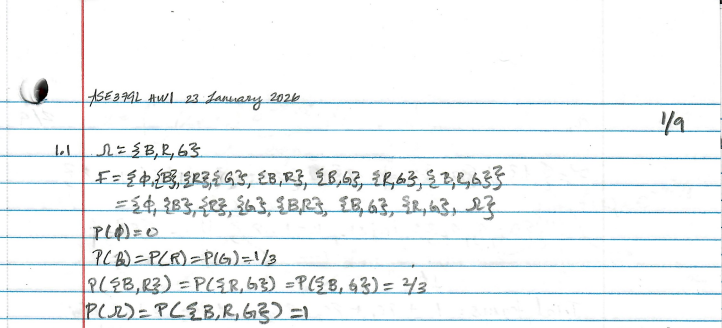
# 1.2
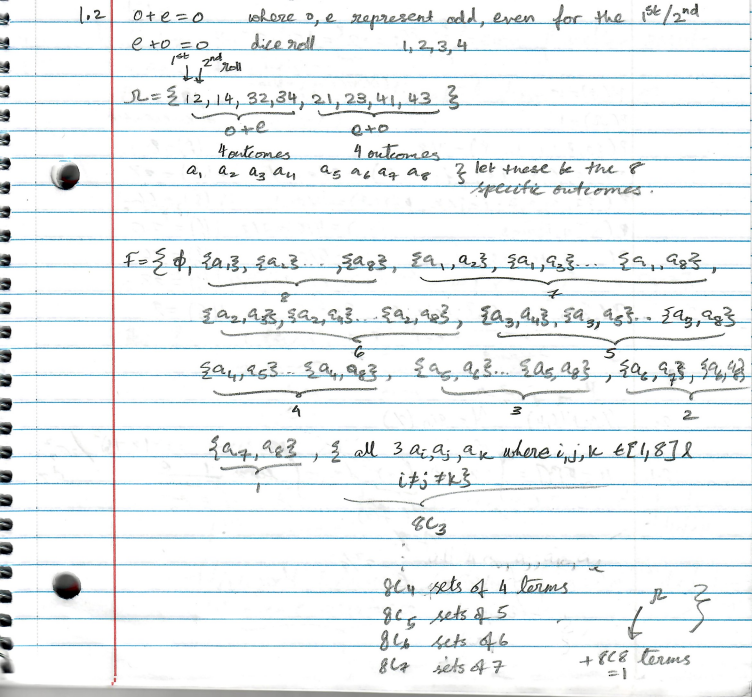
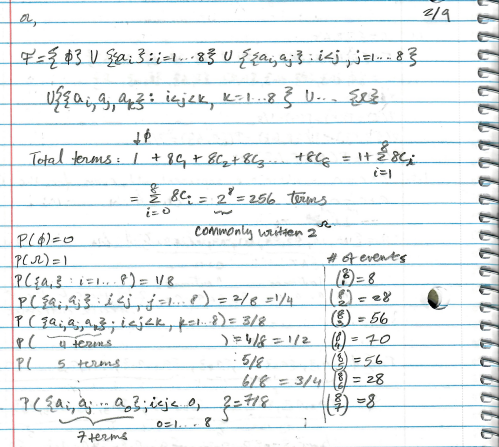

## 2.1

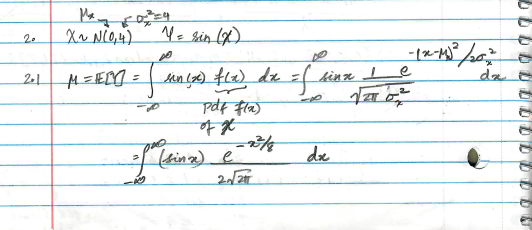

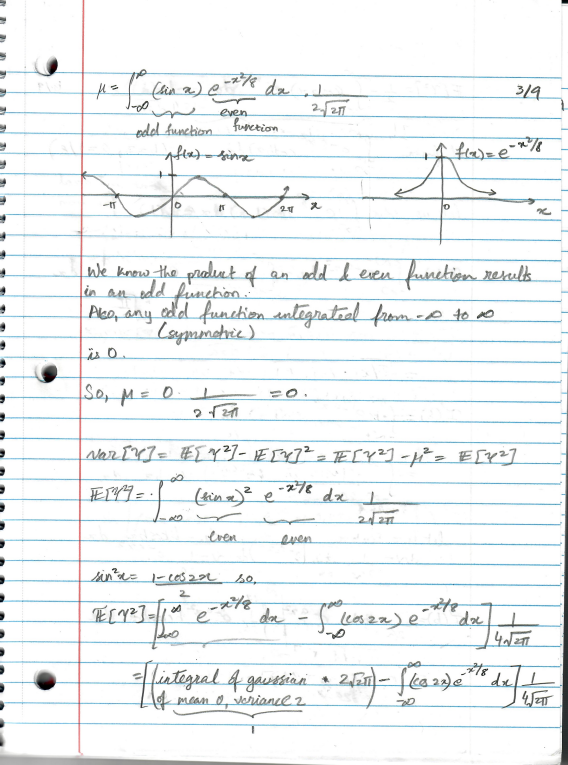

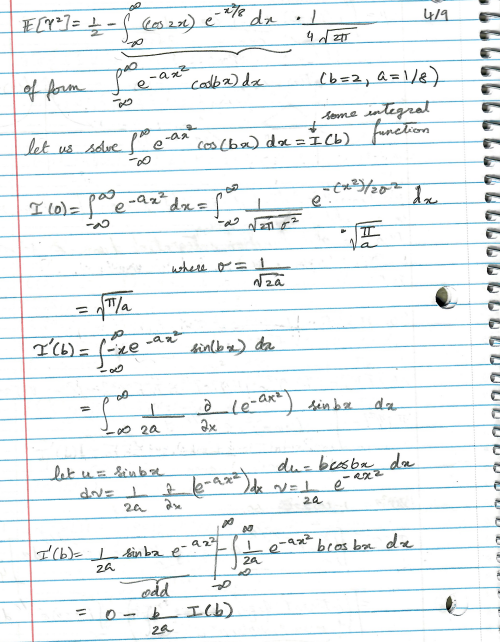

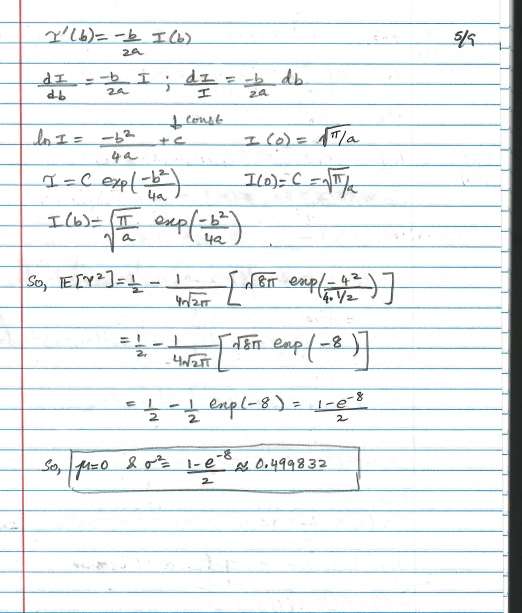

# 2.2

Analytical values:
  μ = E[Y] = 0.0
  σ² = Var[Y] = 0.49983227

Monte Carlo simulation with n = 10,000,000 samples...
Monte Carlo results:
  E[Y] ≈ -0.00000488 (error = 0.00000488)
  Var[Y] ≈ 0.49985550 (error = 0.00002323)

Visualizing convergence of Monte Carlo estimates...


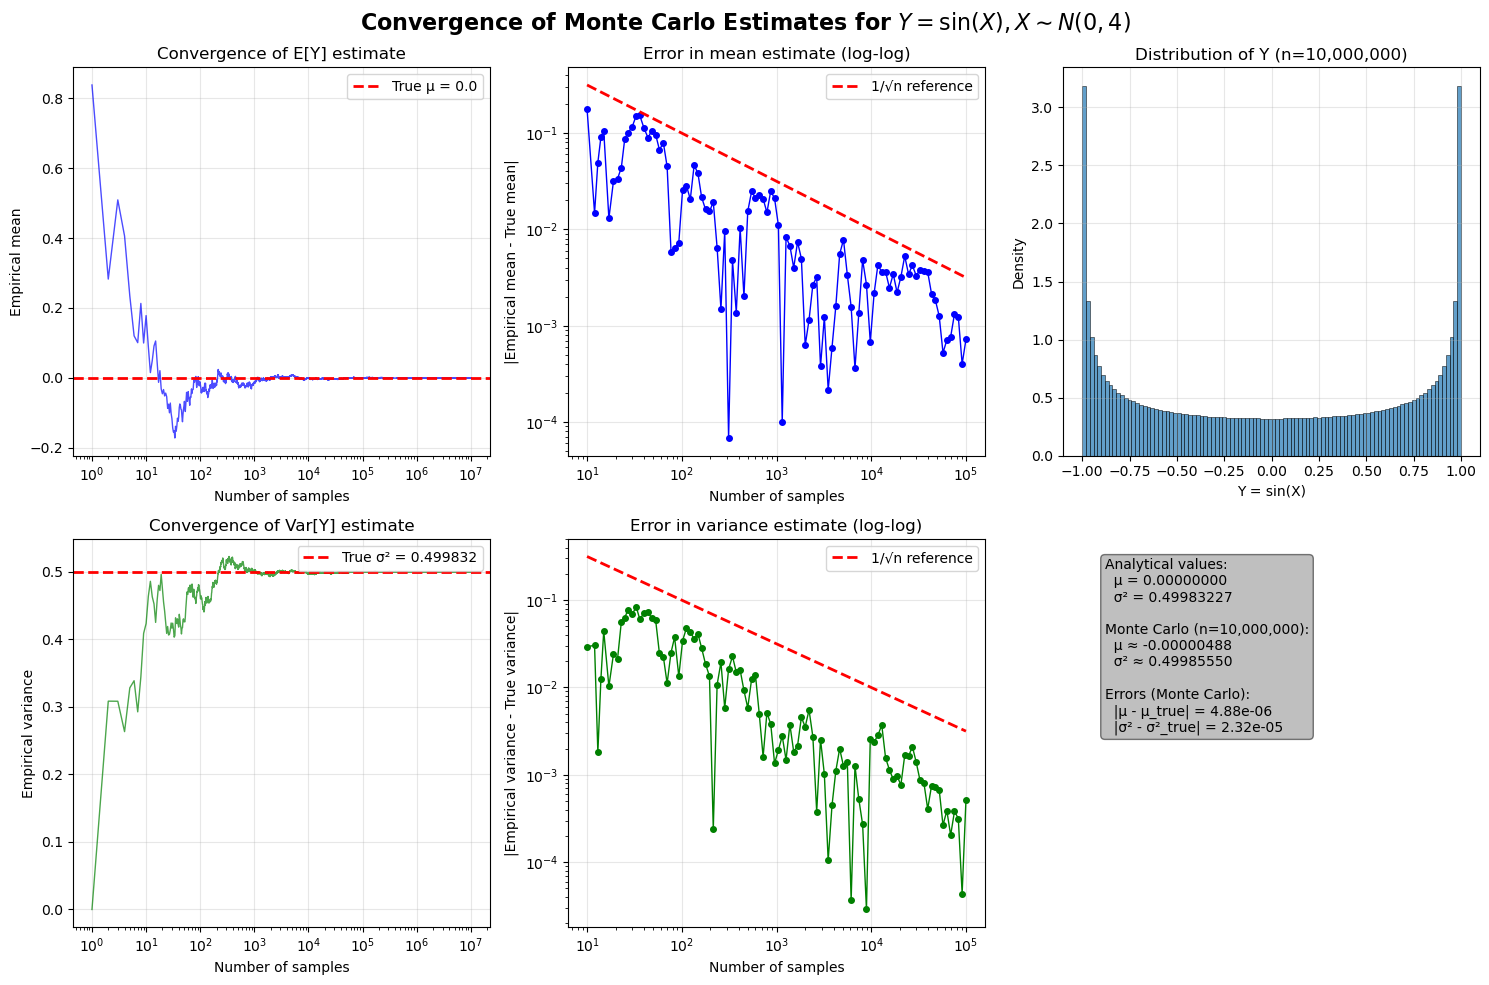

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# =============================================
# 2.1: Solve using computer integration/simulation
# =============================================

# True analytical values (from theory)
mu_true = 0.0
sigma2_true = (1 - np.exp(-8)) / 2
print(f"Analytical values:")
print(f"  μ = E[Y] = {mu_true}")
print(f"  σ² = Var[Y] = {sigma2_true:.8f}")

# =============================================
# Method 1: Direct Monte Carlo simulation
# =============================================

np.random.seed(42)

# Use a large number of samples for accurate estimation
n_mc = int(1e7)  # 10 million samples
print(f"\nMonte Carlo simulation with n = {n_mc:,} samples...")

# Generate X ~ N(0, 4) and Y = sin(X)
X = np.random.normal(loc=0, scale=2, size=n_mc)  # scale=2 for variance 4
Y = np.sin(X)

# Compute empirical mean and variance
mu_mc = np.mean(Y)
sigma2_mc = np.var(Y, ddof=1)

print(f"Monte Carlo results:")
print(f"  E[Y] ≈ {mu_mc:.8f} (error = {abs(mu_mc - mu_true):.8f})")
print(f"  Var[Y] ≈ {sigma2_mc:.8f} (error = {abs(sigma2_mc - sigma2_true):.8f})")


# =============================================
print(f"\nVisualizing convergence of Monte Carlo estimates...")

# Compute cumulative means and variances
cumulative_means = np.cumsum(Y) / np.arange(1, n_mc + 1)
cumulative_sumsq = np.cumsum(Y**2)
cumulative_vars = (cumulative_sumsq / np.arange(1, n_mc + 1) - cumulative_means**2) 

# Create figure with convergence plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Convergence of Monte Carlo Estimates for $Y = \sin(X), X \sim N(0,4)$', 
             fontsize=16, fontweight='bold')

# Plot 1: Mean convergence (full range)
ax = axes[0, 0]
ax.plot(np.arange(1, n_mc + 1), cumulative_means, 'b-', alpha=0.7, linewidth=1)
ax.axhline(y=mu_true, color='r', linestyle='--', linewidth=2, label=f'True μ = {mu_true}')
ax.set_xscale('log')
ax.set_xlabel('Number of samples')
ax.set_ylabel('Empirical mean')
ax.set_title('Convergence of E[Y] estimate')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 2: Variance convergence (full range)
ax = axes[1, 0]
ax.plot(np.arange(1, n_mc+ 1), cumulative_vars, 'g-', alpha=0.7, linewidth=1)
ax.axhline(y=sigma2_true, color='r', linestyle='--', linewidth=2, 
           label=f'True σ² = {sigma2_true:.6f}')
ax.set_xscale('log')
ax.set_xlabel('Number of samples')
ax.set_ylabel('Empirical variance')
ax.set_title('Convergence of Var[Y] estimate')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 3: Error in mean (log-log)
ax = axes[0, 1]
sample_sizes = np.logspace(1, 5, 100).astype(int)
sample_sizes = np.unique(sample_sizes)  # Remove duplicates
errors_mean = []

for n in sample_sizes:
    sample = Y[:n]
    errors_mean.append(abs(np.mean(sample) - mu_true))

ax.loglog(sample_sizes, errors_mean, 'bo-', markersize=4, linewidth=1)
ax.loglog(sample_sizes, 1/np.sqrt(sample_sizes), 'r--', linewidth=2, label='1/√n reference')
ax.set_xlabel('Number of samples')
ax.set_ylabel('|Empirical mean - True mean|')
ax.set_title('Error in mean estimate (log-log)')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 4: Error in variance (log-log)
ax = axes[1, 1]
errors_var = []

for n in sample_sizes:
    sample = Y[:n]
    errors_var.append(abs(np.var(sample, ddof=1) - sigma2_true))

ax.loglog(sample_sizes, errors_var, 'go-', markersize=4, linewidth=1)
ax.loglog(sample_sizes, 1/np.sqrt(sample_sizes), 'r--', linewidth=2, label='1/√n reference')
ax.set_xlabel('Number of samples')
ax.set_ylabel('|Empirical variance - True variance|')
ax.set_title('Error in variance estimate (log-log)')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 5: Distribution of Y
ax = axes[0, 2]
ax.hist(Y, bins=100, density=True, alpha=0.7, edgecolor='black', linewidth=0.5)
ax.set_xlabel('Y = sin(X)')
ax.set_ylabel('Density')
ax.set_title(f'Distribution of Y (n={n_mc:,})')
ax.grid(True, alpha=0.3)

# Plot 6: Summary statistics
ax = axes[1, 2]
ax.axis('off')
summary_text = (
    f'Analytical values:\n'
    f'  μ = {mu_true:.8f}\n'
    f'  σ² = {sigma2_true:.8f}\n\n'
    f'Monte Carlo (n={n_mc:,}):\n'
    f'  μ ≈ {mu_mc:.8f}\n'
    f'  σ² ≈ {sigma2_mc:.8f}\n\n'
    f'Errors (Monte Carlo):\n'
    f'  |μ - μ_true| = {abs(mu_mc - mu_true):.2e}\n'
    f'  |σ² - σ²_true| = {abs(sigma2_mc - sigma2_true):.2e}'
)
ax.text(0.1, 0.95, summary_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='gray', alpha=0.5))

plt.tight_layout()
plt.show()


The absolute errors of both the sample mean and the sample variance converge at an
$O(n^{-1/2})$ rate, as evidenced by the approximately $-\tfrac{1}{2}$ slope on the
log--log plot. By the central limit theorem, the standard deviation of the average of
$n$ independent and identically distributed (IID) samples scales as $1/\sqrt{n}$.
Consequently, for the sample mean $\bar{X}_n$, $|\bar{X}_n - \mu| = O(n^{-1/2})$.

A similar convergence rate holds for the sample variance $s_n^2$. Writing $s_n^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \bar{X}_n)^2,$ 
we see that it is itself an average of transformed random variables. Although the
terms $(X_i - \bar{X}_n)^2$ are not independent due to the shared dependence on
$\bar{X}_n$, this dependence becomes negligible asymptotically. By applying the
central limit theorem to the sequence $Z_i = (X_i - \mu)^2$, which has finite variance
under standard assumptions, we obtain $s_n^2 - \sigma^2 = O(n^{-1/2}).$

Both the sample mean and the sample variance can therefore be viewed as sample
averages of functions of the data: $\bar{X}_n$ averages $X_i$, while $s_n^2$ averages
squared deviations. Any such sample mean of IID data with finite variance inherits the
characteristic $1/\sqrt{n}$ scaling of its standard error. As a result, on a log--log
plot, the absolute errors of both statistics display an approximate slope of
$-\tfrac{1}{2}$, reflecting the fundamental $n^{-1/2}$ convergence rate of Monte
Carlo estimators.


## 3: Heat Equation



In [ ]:
from heat_rod import SteadyStateRod
import numpy as np

# --- Parameters from Example 3.5 ---
a = 0.95  # cm
b = 0.95  # cm
h = 0.002  # W/cm^2·C
k = 2.37  # W/cm·C
Phi = -18  # W/cm^2 (use negative for heat flux)
Tamb = 21  # C
L = 70
# --- Create rod instance ---
rod = SteadyStateRod(a, b, h, k, Phi, Tamb, L)

# --- Measurement locations ---
x0 = 10
dx = 4
x_vals = x0 + np.arange(15)*dx  # 15 locations: 10, 14, 18, ..., 66

# --- Evaluate Ts and derivatives ---
Ts_vals = rod.Ts(x_vals)
dTs_dh_vals = rod.dTs_dh(x_vals)
dTs_dk_vals = rod.dTs_dk(x_vals)
dTs_dPhi_vals = rod.dTs_dPhi(x_vals)

# --- Print results like Table 3.2 ---
print(f"{'x (cm)':>6} | {'Ts (C)':>7} | {'dTs/dh (C^2 cm^2/W)':>10} | {'dTs/dk (C^2 cm/W)':>10} | {'dTs/dPhi () b b':>10} ")
print("-"*55)    
for i, x in enumerate(x_vals):
    print(f"{x:6.1f} | {Ts_vals[i]:7.4f} | {dTs_dh_vals[i]:10.4f} | {dTs_dk_vals[i]:10.4f} | {dTs_dPhi_vals[i]:10.4f}")


x (cm) |  Ts (C) |     dTs/dh |     dTs/dk |   dTs/dPhi 
-------------------------------------------------------
  10.0 | 91.2698 | -28169.0259 |    -5.8784 |    -3.9039
  14.0 | 76.3885 | -25543.2402 |    -1.8152 |    -3.0771
  18.0 | 64.6710 | -22787.0997 |     0.8030 |    -2.4262
  22.0 | 55.4481 | -20079.4108 |     2.4096 |    -1.9138
  26.0 | 48.1929 | -17530.1660 |     3.3196 |    -1.5107
  30.0 | 42.4909 | -15201.9433 |     3.7607 |    -1.1939
  34.0 | 38.0165 | -13125.3738 |     3.8963 |    -0.9454
  38.0 | 34.5142 | -11310.2370 |     3.8423 |    -0.7508
  42.0 | 31.7837 | -9753.3536 |     3.6806 |    -0.5991
  46.0 | 29.6693 | -8444.1446 |     3.4679 |    -0.4816
  50.0 | 28.0500 | -7368.5026 |     3.2435 |    -0.3917
  54.0 | 26.8334 | -6511.4519 |     3.0335 |    -0.3241
  58.0 | 25.9501 | -5858.9472 |     2.8556 |    -0.2750
  62.0 | 25.3495 | -5399.0651 |     2.7210 |    -0.2416
  66.0 | 24.9973 | -5122.7715 |     2.6364 |    -0.2221


# 3.1 & 3.2
The values of $T_s(x,q)$ at $x_j$ and the respective partials at the same $x_j$ are presented in the below table.
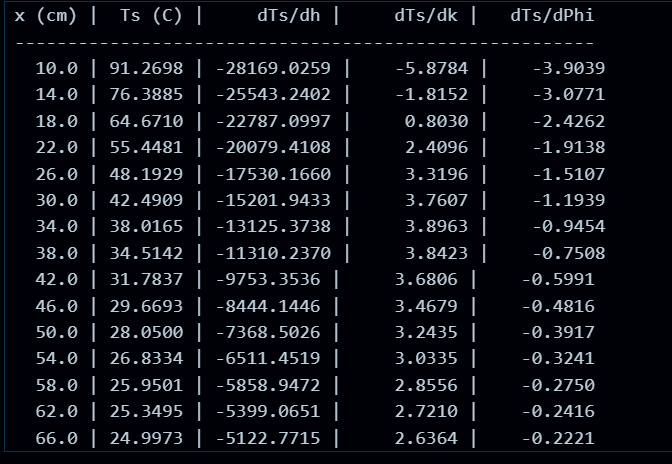

Text(0.5, 1.0, 'Temperature vs position (x)')

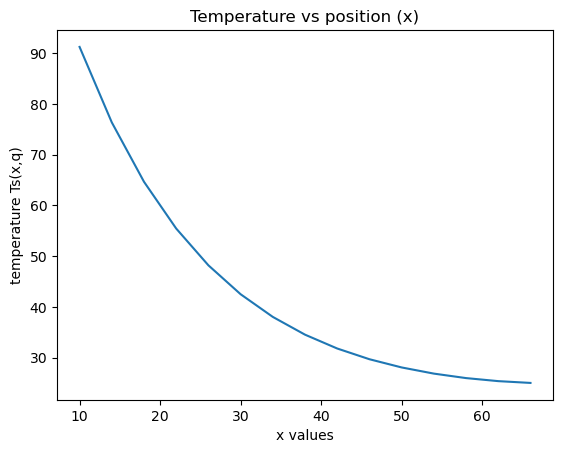

In [5]:
import matplotlib.pyplot as plt
plt.plot(x_vals,Ts_vals)
plt.xlabel("x values")
plt.ylabel("temperature Ts(x,q)")
plt.title("Temperature vs position (x)")

# 4 - 4.1
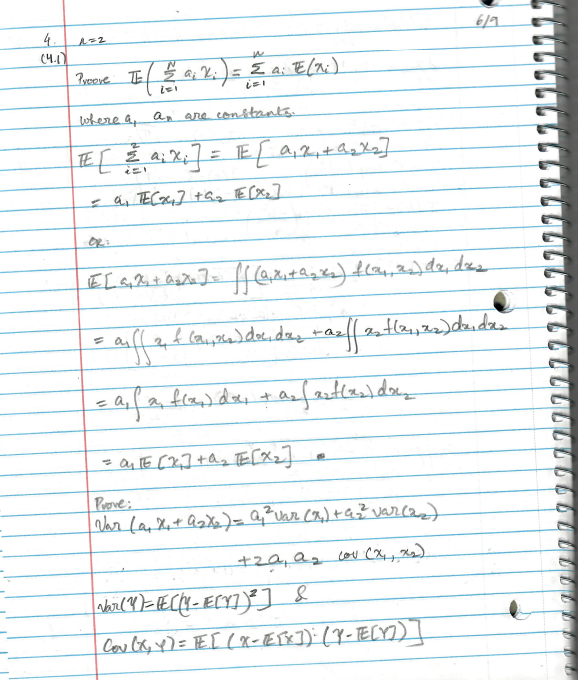

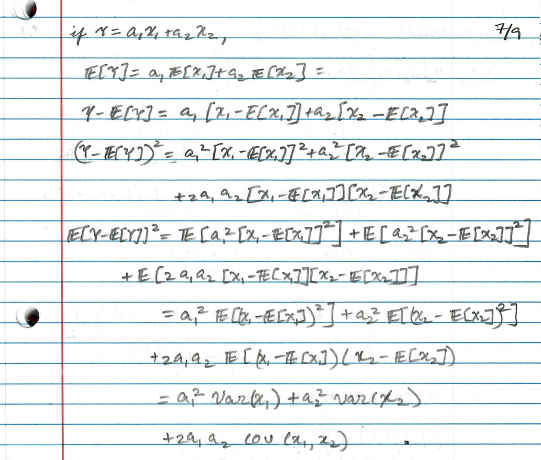

# 5 - 4.2
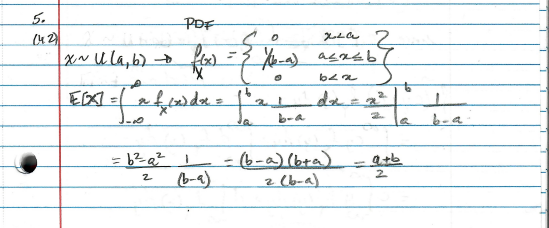

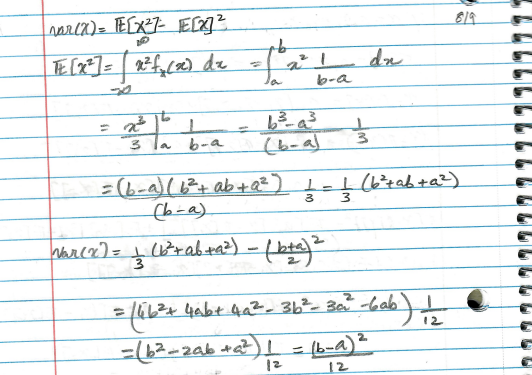

# 6 - 4.4
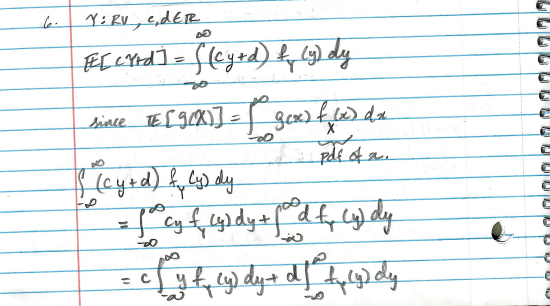

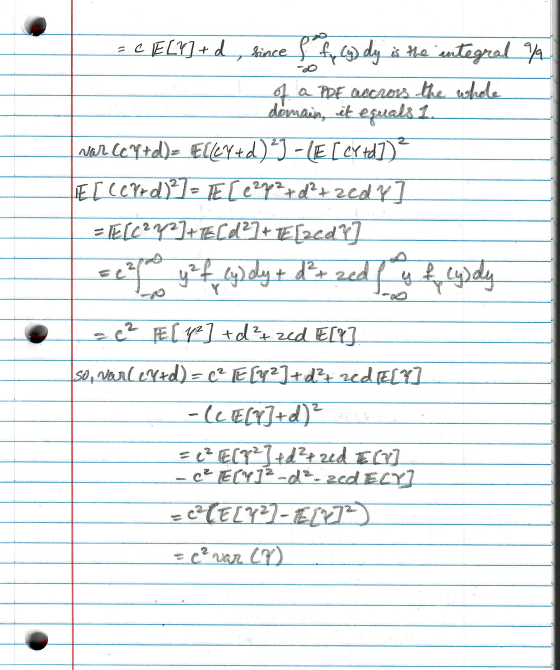